In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install --user scipy wordcloud nltk seaborn textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import the Packages


In [ ]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# nltk.download('wordnet')   # for Lemmatization

%matplotlib inline

In [ ]:
total_data = pd.read_csv("/content/sample_data/chatgpt_labeled_5K.csv", encoding="ISO-8859-1")

In [ ]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-7-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
total_data.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral
1,1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good
2,2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral
3,3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good
4,4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now ï¿½ https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad


In [ ]:
total_data = total_data.loc[:, ~total_data.columns.str.contains('^Unnamed')]

In [ ]:
tweet = total_data.columns.values[0]
sentiment = total_data.columns.values[1]
tweet, sentiment

('tweets', 'labels')

In [ ]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  5001 non-null   object
 1   labels  5001 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


#Preprocessing


In [ ]:
import re

In [ ]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [ ]:
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;)
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    # for word in tweet.split():
    #     if word.lower() in contractions:
    #         tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space
    return tweet

In [ ]:
total_data['processed_tweet'] = np.vectorize(process_tweet)(total_data[tweet])

In [ ]:
total_data.head(10)

,tweets,labels,processed_tweet
0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,chatgpt optimizing language models for dialogue
1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help us improve it
2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral,chatgpt optimizing language models for dialogue ai machinelearning datascience artificialintelligence ntrending ai ml article identified amp digested via granola machine driven rss bot by ramsey elbasheer
3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone
4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now ï¿½ https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,as of minutes ago released their new chatgpt nand you can use it right now ï ½
5,"Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64",good,just launched chatgpt our new ai system which is optimized for dialogue it out here
6,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now \n \nhttps://t.co/kUcnWYhQ1b\n\nï¿½ https://t.co/kCE59Xs0YG https://t.co/cSn5h6h1M1",bad,as of minutes ago released their new chatgpt nand you can use it right now
7,ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo. https://t.co/CVIJERbW38,good,chatgpt coming out strong refusing to help me stalk someone but agreeing providing that someone is waldo
8,"#0penAl just deployed a thing I've been helping build the last couple of months, it's a chatbot based on GPT 3. I'm really excited to share this vl\nhttps://t.co/zp7HniUxBu\nhttps://t.co/NISJLWhOMw",good,penal just deployed thing ve been helping build the last couple of months it chatbot based on gpt really excited to share this vl
9,Research preview of our newest model: ChatGPT\n\nWe're trying something new with this preview: Free and immediately available for everyone (no waitlist!) https://t.co/0RDT7QNZRD,neutral,research preview of our newest model chatgpt nwe re trying something new with this preview free and immediately available for everyone no waitlist


#Spelling Correction

In [ ]:
from textblob import TextBlob
# total_data['processed_tweet'].apply(lambda x: str(TextBlob(x).correct()))
# total_data.head(10)

In [ ]:
tokenized_tweet = total_data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [chatgpt, optimizing, language, models, for, dialogue]                                                                                                                                                                                 
1    [try, talking, with, chatgpt, our, new, ai, system, which, is, optimized, for, dialogue, your, feedback, will, help, us, improve, it]                                                                                                  
2    [chatgpt, optimizing, language, models, for, dialogue, ai, machinelearning, datascience, artificialintelligence, ntrending, ai, ml, article, identified, amp, digested, via, granola, machine, driven, rss, bot, by, ramsey, elbasheer]
3    [thrilled, to, share, that, chatgpt, our, new, model, optimized, for, dialog, is, now, public, free, and, accessible, to, everyone]                                                                                                    
4    [as, of, minutes, ago, released, their, new, ch

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0    [chatgpt, optimizing, language, model, for, dialogue]                                                                                                                                                                               
1    [try, talking, with, chatgpt, our, new, ai, system, which, is, optimized, for, dialogue, your, feedback, will, help, u, improve, it]                                                                                                
2    [chatgpt, optimizing, language, model, for, dialogue, ai, machinelearning, datascience, artificialintelligence, ntrending, ai, ml, article, identified, amp, digested, via, granola, machine, driven, r, bot, by, ramsey, elbasheer]
3    [thrilled, to, share, that, chatgpt, our, new, model, optimized, for, dialog, is, now, public, free, and, accessible, to, everyone]                                                                                                 
4    [a, of, minute, ago, released, their, new, chatgpt, nand, y

In [ ]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
            "you", "your", "yours", "yourself", "yourselves", "he", "him",
            "his", "himself", "she", "her", "hers", "herself", "it", "its",
            "itself", "they", "them", "their", "theirs", "themselves", "what",
            "which", "who", "whom", "this", "that", "these", "those", "am", "is",
            "are", "was", "were", "be", "been", "being", "have", "has", "had",
            "having", "do", "does", "did", "doing", "a", "an", "the", "and",
            "but", "if", "or", "because", "as", "until", "while", "of", "at",
            "by", "for", "with", "about", "against", "between", "into", "through",
            "during", "before", "after", "above", "below", "to", "from", "up",
            "down", "in", "out", "on", "off", "over", "under", "again", "further",
            "then", "once", "here", "there", "when", "where", "why", "how", "all",
            "any", "both", "each", "few", "more", "most", "other", "some", "such",
            "only", "own", "same", "so", "than", "too", "very",
            "can", "will", "just", "should", "now"}

In [ ]:
for i in range(len(tokenized_tweet)):

    # Below code is used for no stop word removal
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

    # Used for stop word removal
    # (Below is commented out as sentiment analysis is giving better accuracy without removing stop words.
    # If you still want to check, comment out the above line, uncomment the line below and run the code again.)

    # tokenized_tweet[i] = ' '.join([word for word in tokenized_tweet[i] if word not in stop_words])


total_data['processed_tweet'] = tokenized_tweet
total_data.head()

,tweets,labels,processed_tweet
0,ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI,neutral,chatgpt optimizing language model for dialogue
1,"Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr",good,try talking with chatgpt our new ai system which is optimized for dialogue your feedback will help u improve it
2,ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34,neutral,chatgpt optimizing language model for dialogue ai machinelearning datascience artificialintelligence ntrending ai ml article identified amp digested via granola machine driven r bot by ramsey elbasheer
3,"THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71",good,thrilled to share that chatgpt our new model optimized for dialog is now public free and accessible to everyone
4,"As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now ï¿½ https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1",bad,a of minute ago released their new chatgpt nand you can use it right now ï ½


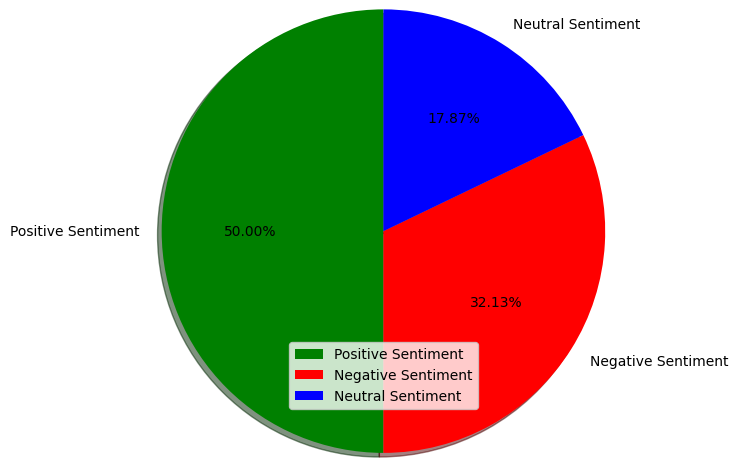

In [ ]:
sentiments = ['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment']
slices = [(total_data[sentiment] != "good").sum(), (total_data[sentiment] == "bad").sum(), (total_data[sentiment] == "neutral").sum()]
colors = ['g', 'r','b']
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0,0,0), radius = 1.5, autopct = '%1.2f%%')
plt.legend()
plt.show()

<Figure size 3840x2880 with 0 Axes>

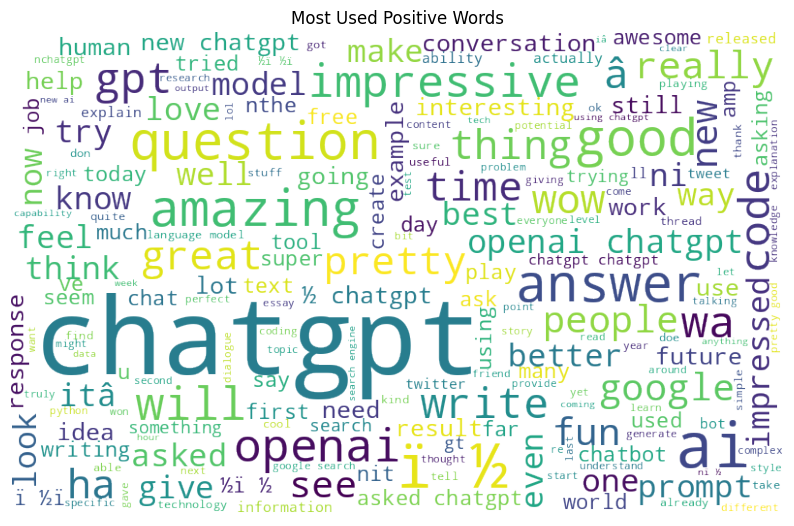

In [ ]:
positive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == 'good']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('/content/sample_data/positive_words.png')
plt.show()

<Figure size 3840x2880 with 0 Axes>

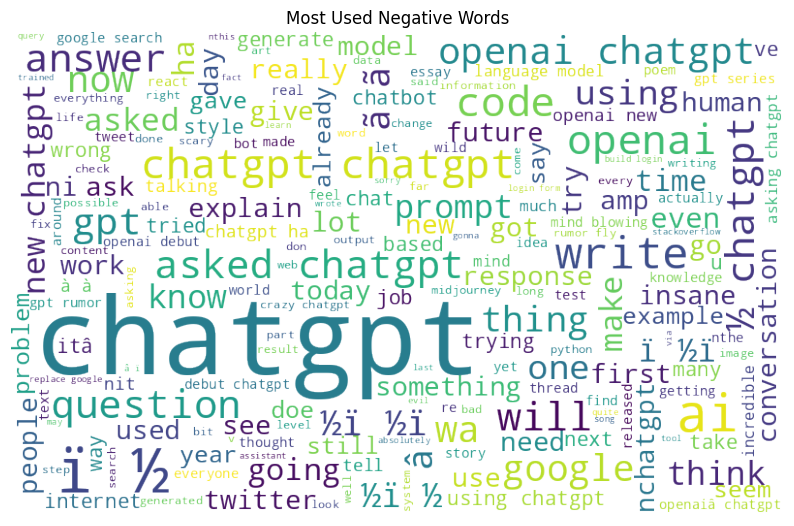

In [ ]:
negetive_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == "bad"]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negative Words")
plt.savefig('/content/sample_data/negetive_words.png')
plt.show()

<Figure size 3840x2880 with 0 Axes>

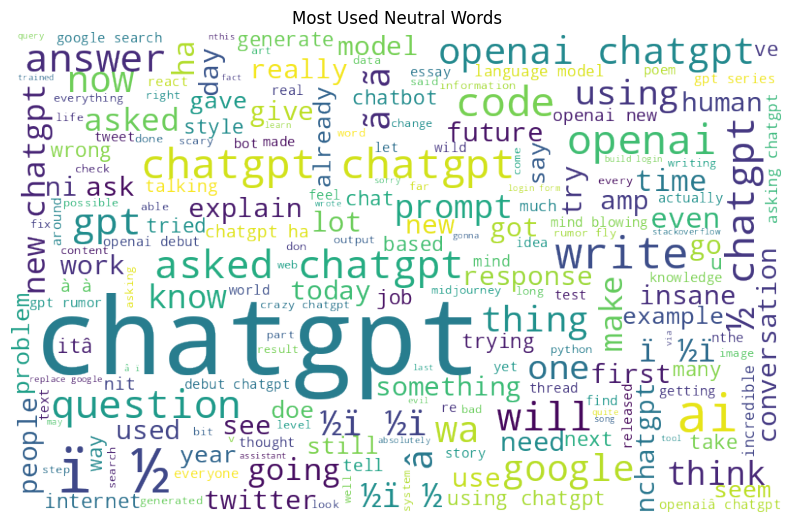

In [ ]:
neutral_words =' '.join([text for text in total_data['processed_tweet'][total_data[sentiment] == "neutral"]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Neutral Words")
plt.savefig('/content/sample_data/neutral_words.png')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_tweet'])
final_vectorized_data

<5001x55626 sparse matrix of type '<class 'numpy.int64'>'
	with 167473 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data[sentiment],
                                                    test_size=0.2, random_state=69)

In [ ]:
print(type(X_train))



print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

<class 'scipy.sparse._csr.csr_matrix'>
X_train_shape :  (4000, 55626)
X_test_shape :  (1001, 55626)
y_train_shape :  (4000,)
y_test_shape :  (1001,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

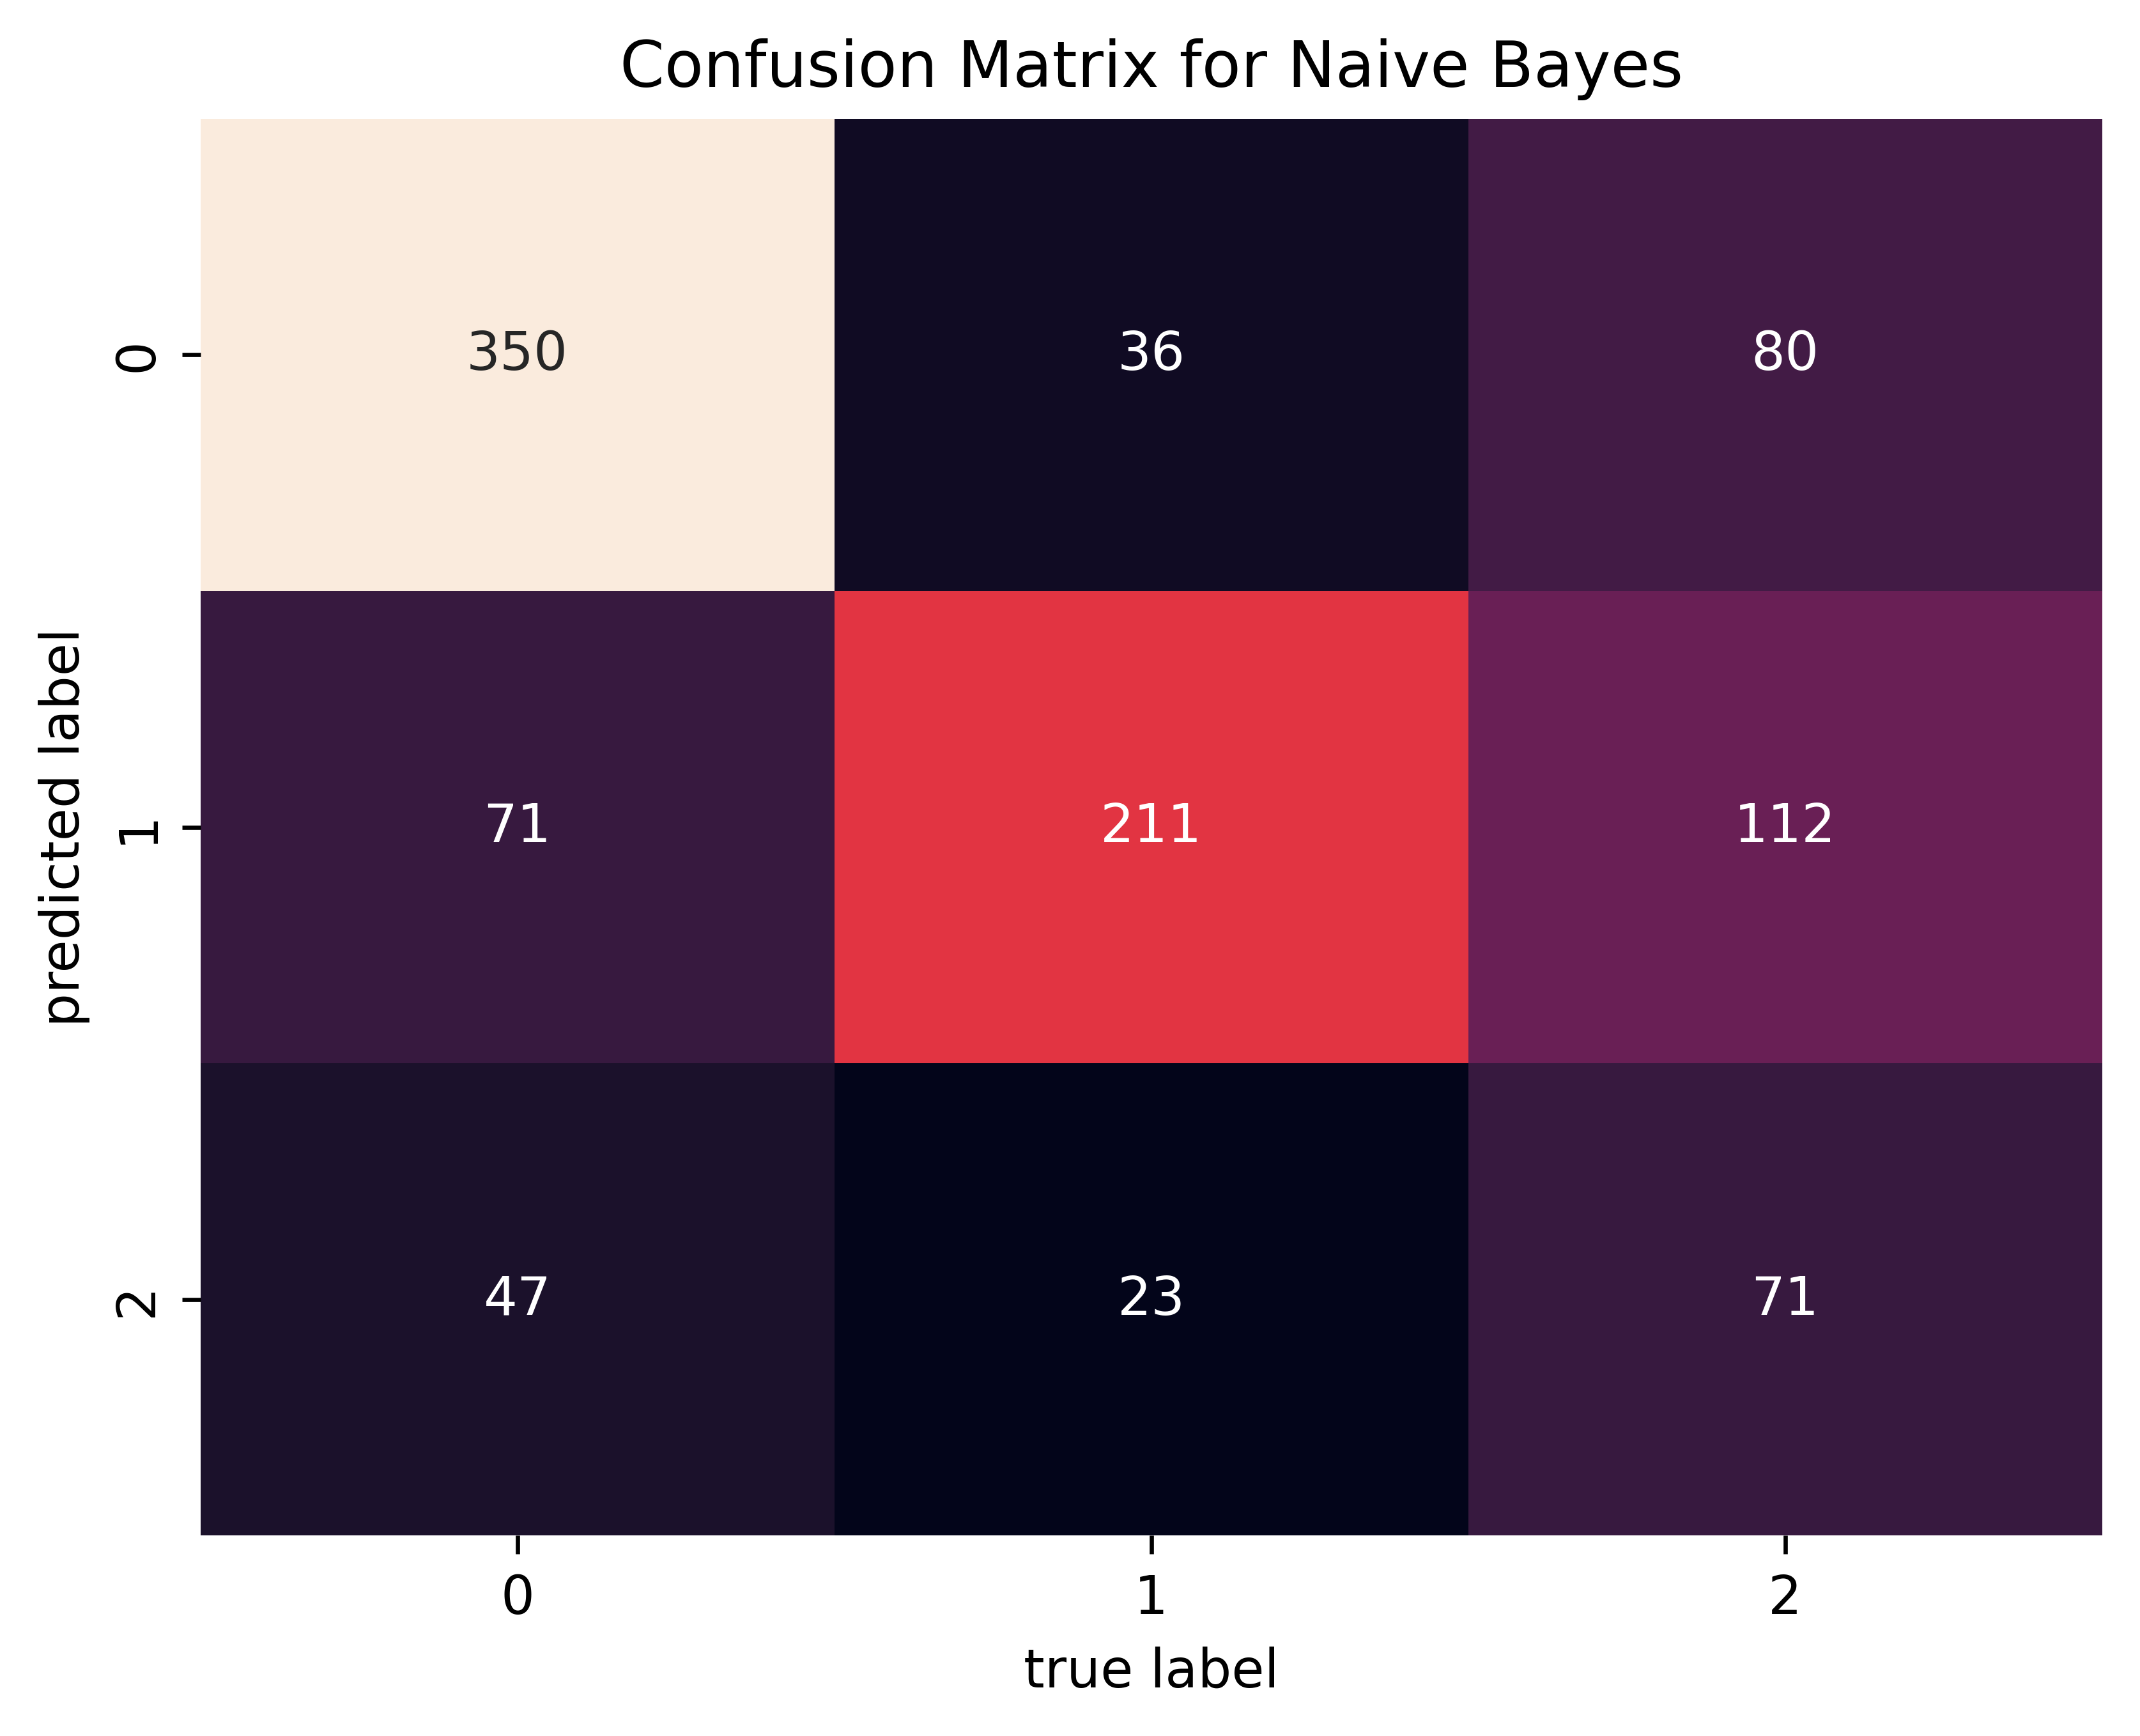

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("/content/sample_data/confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.6313686313686314


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

         bad       0.75      0.75      0.75       468
        good       0.54      0.78      0.64       270
     neutral       0.50      0.27      0.35       263

    accuracy                           0.63      1001
   macro avg       0.60      0.60      0.58      1001
weighted avg       0.63      0.63      0.61      1001

